# Radoslav Nikolov
```
Additional tasks
```

## Problem 1. Gas consumption

In [21]:
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
gas_data = pd.read_table("temp_gas.csv")
gas_data

,temp_diff,power
0,10.3,69.81
1,11.4,82.75
2,11.5,81.75
3,12.5,80.38
4,13.1,85.89
5,13.4,75.32
6,13.6,69.81
7,15.0,78.54
8,15.2,81.29
9,15.3,99.20


The data appears to be clean - there are no missing values. We cannot be sure if there are any erroneous values (such as "human errors"). We can check for outliers by plotting histograms or boxplots.

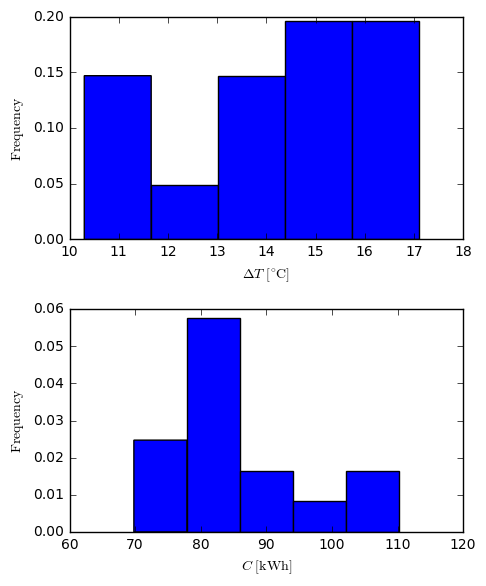

In [3]:
f,(ax1,ax2) = plt.subplots(2,1, figsize = (5,6))
ax1.hist(gas_data["temp_diff"], bins = 5, normed = 1)
ax1.set_xlabel(r"$\Delta T\ [^{\circ} \mathrm{C}]$")
ax1.set_ylabel(r"$\mathrm{Frequency}$")

ax2.hist(gas_data["power"], bins = 5, normed = 1)
ax2.set_xlabel(r"$C\ [\mathrm{kWh}]$")
ax2.set_ylabel(r"$\mathrm{Frequency}$")

f.tight_layout()
plt.show()


Indeed, there are no outliers.
### Correlation
To see if there is any correlation between the two variables, we'll plot $C = f(T)$

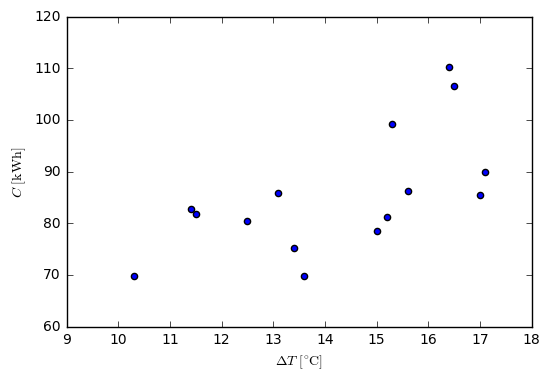

In [7]:
plt.scatter(gas_data["temp_diff"], gas_data["power"])
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.show()

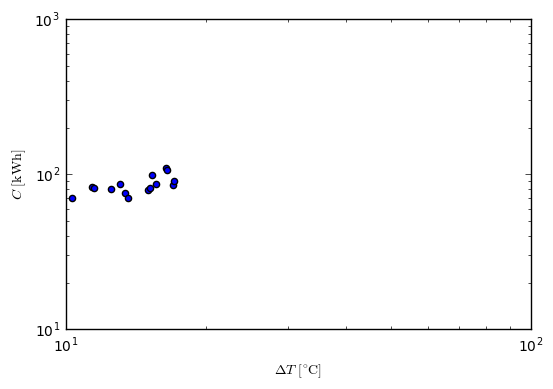

In [17]:
plt.scatter(gas_data["temp_diff"], gas_data["power"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.show()

There appears to be an upward trend. To see how strong it is, we will check the Pearson correlation coefficient.

In [20]:
corr = np.corrcoef(gas_data["temp_diff"], gas_data["power"])[1][0]
print("Correlation: " + str(corr))

Correlation: 0.626803947457


This indicates a positive correlation, that is, the gas consumption tends to increase when the temperature difference increases.

We can also add a trendline to the plot.

3.41274032684 36.8936562725 0.626803947457 0.0123969045057 1.17661931889


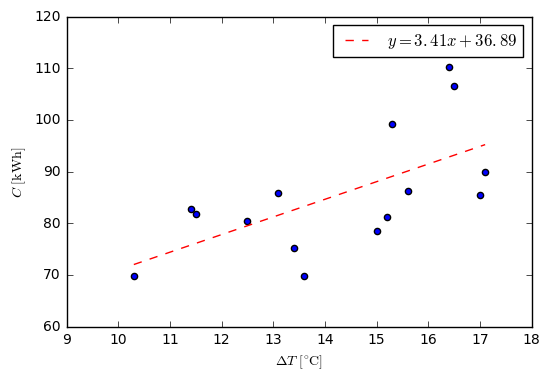

Correlation: 0.626803947457
Coefficient of determination: 0.392883188547


In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gas_data["temp_diff"], gas_data["power"])
print(slope, intercept, r_value, p_value, std_err)
plt.scatter(gas_data["temp_diff"], gas_data["power"], label=None)
regr_label = r"$y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2)) + "$"
plt.plot(gas_data["temp_diff"], gas_data["temp_diff"] * slope + intercept, color = 'r', linestyle = '--', label = regr_label)
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.legend()
plt.show()

print("Correlation: " + str(corr))
print("Coefficient of determination: " + str(r_value**2))


### This indicates a positive correlation, that is, the gas consumption tends to increase when the temperature difference increases.
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

#### stats.linregress documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

Parameters:	
```
x, y : array_like
Two sets of measurements. Both arrays should have the same length. If only x is given (and y=None), then it must be a two-dimensional array where one dimension has length 2. The two sets of measurements are then found by splitting the array along the length-2 dimension.
```

Returns:
```
slope : float
slope of the regression line

intercept : float
intercept of the regression line

rvalue : float
correlation coefficient

pvalue : float
two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.

stderr : float
Standard error of the estimated gradient.
```


## Problem 2. Cloud Seeding